# Carbon dioxide readings at WCPSS District 9 Elem 01, Portable 01, Student 01, Sept 1, 2022

# Carbon dioxide readings at WCPSS District 9 Elem 01, Portable 01, Student 01, Sept 1, 2022

Analysis done by Edderic Ugaddan

In [2]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../co2-data/SchoolCO2Data/North Carolina/Wake County Public Schools/Parent Measurements/District9/Elem01/Portable01/WCPSS_District9_Elem01_Portable01_Student01_09012022.csv')

In [7]:
df.columns

Index(['Time', 'CO2', 'Temp', 'Humidity'], dtype='object')

In [12]:
df['Time']

0       9:20:26
1       9:21:26
2       9:22:26
3       9:23:26
4       9:24:26
         ...   
381    15:41:26
382    15:42:26
383    15:43:26
384    15:44:26
385    15:45:26
Name: Time, Length: 386, dtype: object

In [22]:
df['time'] = pd.to_datetime('2022-09-01 ' + df['Time'])
df['Carbon dioxide(ppm)'] = df['CO2']

In [23]:
df['time']

0     2022-09-01 09:20:26
1     2022-09-01 09:21:26
2     2022-09-01 09:22:26
3     2022-09-01 09:23:26
4     2022-09-01 09:24:26
              ...        
381   2022-09-01 15:41:26
382   2022-09-01 15:42:26
383   2022-09-01 15:43:26
384   2022-09-01 15:44:26
385   2022-09-01 15:45:26
Name: time, Length: 386, dtype: datetime64[ns]

<AxesSubplot: xlabel='time'>

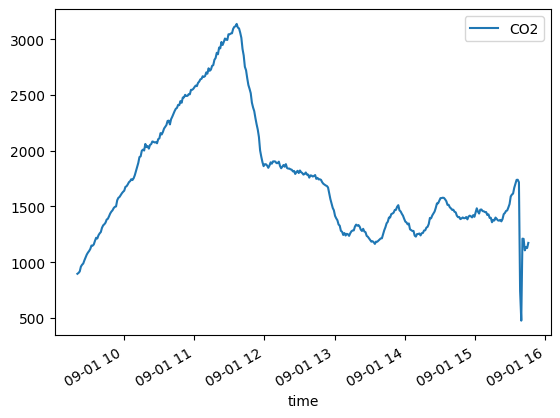

In [24]:
df.plot(x='time', y='CO2')

In [25]:
time_of_study = df

In [29]:
date = '2022-09-01'

In [39]:
times_of_interest = [
    {
        'start': f'{date} 08:45:00',
        'stop': f'{date} 09:15:00',
        'area': 'classroom 01',
        'notes': 'Arrival & Morning Work',
        'color': 'red'
    },
    
    {
        'start': f'{date} 09:15:00',
        'stop': f'{date} 09:30:00',
        'area': 'classroom 01',
        'notes': 'Morning Meeting',
        'color': 'orange'
    },
    {
        'start': f'{date} 09:30:00',
        'stop': f'{date} 10:30:00',
        'area': 'classroom 01',
        'notes': 'Math',
        'color': 'yellow'
    },
    {
        'start': f'{date} 10:30:00',
        'stop': f'{date} 11:30:00',
        'area': 'classroom 01',
        'notes': 'English Language Arts',
        'color': 'green'
    },
    {
        'start': f'{date} 11:30:00',
        'stop': f'{date} 11:50:00',
        'area': 'classroom 01',
        'notes': 'WIN Time',
        'color': 'blue'
    },
    {
        'start': f'{date} 11:55:00',
        'stop': f'{date} 12:25:00',
        'area': 'classroom 01',
        'notes': "Lunch",
        'color': 'indigo'
    },
    {
        'start': f'{date} 12:25:00',
        'stop': f'{date} 13:10:00',
        'area': 'classroom 01',
        'notes': "Specials",
        'color': 'violet'
    },
    {
        'start': f'{date} 13:15:00',
        'stop': f'{date} 14:25:00',
        'area': 'classroom 01',
        'notes': "English Language Arts",
        'color': 'pink'
    },
    {
        'start': f'{date} 14:25:00',
        'stop': f'{date} 14:55:00',
        'area': "classroom 01",
        'notes': "Recess",
        'color': 'lawngreen'
    },
    {
        'start': f'{date} 14:55:00',
        'stop': f'{date} 15:45:00',
        'area': "classroom 01",
        'notes': "Social Studies",
        'color': 'aquamarine'
    },
    {
        'start': f'{date} 15:45:00',
        'stop': f'{date} 15:55:00',
        'area': "classroom 01",
        'notes': "Dismissal",
        'color': 'salmon'
    },
]


In [40]:
time_of_study

,Time,CO2,Temp,Humidity,time,Carbon dioxide(ppm)
0,9:20:26,896,21.3,53,2022-09-01 09:20:26,896
1,9:21:26,904,21.2,54,2022-09-01 09:21:26,904
2,9:22:26,917,21.2,54,2022-09-01 09:22:26,917
3,9:23:26,960,21.2,54,2022-09-01 09:23:26,960
4,9:24:26,977,21.2,54,2022-09-01 09:24:26,977
...,...,...,...,...,...,...
381,15:41:26,1209,24.2,52,2022-09-01 15:41:26,1209
382,15:42:26,1106,24.2,51,2022-09-01 15:42:26,1106
383,15:43:26,1136,24.2,52,2022-09-01 15:43:26,1136
384,15:44:26,1127,24.1,52,2022-09-01 15:44:26,1127


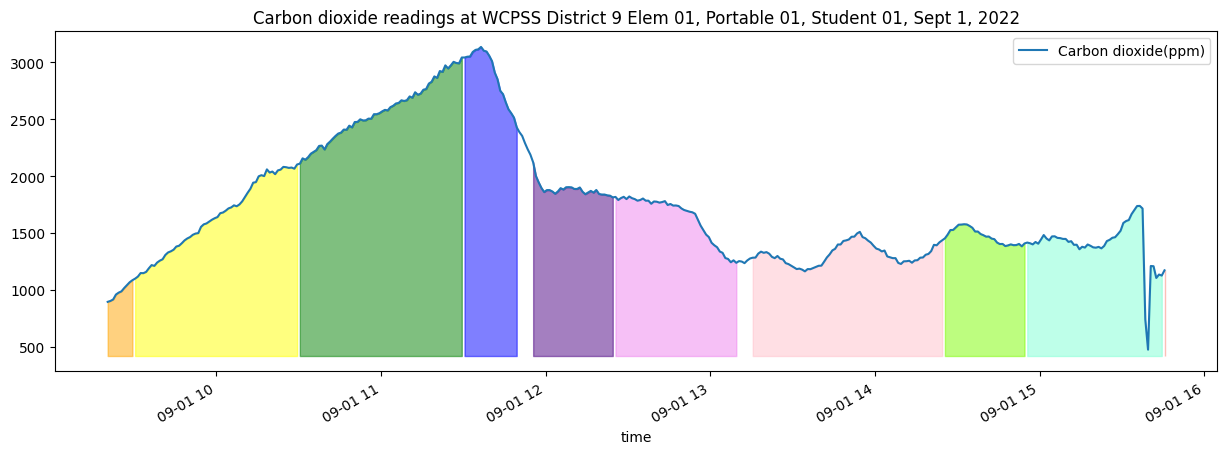

In [44]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
time_of_study.plot(x='time', y='Carbon dioxide(ppm)', ax=ax)
ax.set_title("Carbon dioxide readings at WCPSS District 9 Elem 01, Portable 01, Student 01, Sept 1, 2022")

for time_of_interest in times_of_interest:
    subset = time_of_study[
        (time_of_study['time'] >= time_of_interest['start']) & (time_of_study['time'] <= time_of_interest['stop'])
    ]

    ax.fill_between(subset['time'], y1=420, y2=subset['Carbon dioxide(ppm)'], color=time_of_interest['color'], alpha=0.5)


## What do CO2 readings tell us?

CO2 is an abundant gas around us. Humans emit lots of CO2 -- about 0.038 of our exhaled breath is made up of CO2. For every million molecules in the air, 38,000 of them would be CO2. In contrast, CO2 readings outside are typically around 420ppm. They could measure how good ventilation is in a room. The higher the values, the more likely one is breathing someone else's respiratory backwash. Therefore, CO2 could be a good proxy for airborne-transmitted diseases like COVID-19, flu, RSV, etc.

## Rebreathed fraction

The rebreathed fraction is a proxy for how much someone's air we're breathing in.

$$
\begin{equation}
\begin{aligned}
\hat{f} &= \frac{C_{indoor} - C_{ambient}}{C_{breath}}
\end{aligned}
\end{equation}
$$

$C_{breath} = 38,000 ppm$. $C_{ambient} = 420 ppm$.

When the CO2 reading says 420 ppm, the rebreathed fraction is 0 (i.e. when you're outside, you're getting a *ton* of ventilation, and you're quite safe -- as long as you're far enough from someone to not inhale a jet of their breath).

At 1,000 ppm, like in the beginning of being in the ultrasound room, we're breathing $\frac{1000ppm-420ppm}{38000ppm} = 1.5\%$. 1.5% of every breath one takes is coming from someone in the room.

At 1,830 ppm, like at the end of the ultrasound room session, we're breathing $\frac{1830ppm-420ppm}{38000ppm} = 3.7\%$.

## How good or bad are these numbers?

It depends on how transmissible the airborne pathogens of interest are. Aerosol researchers many times model the transmissibility of a pathogen via *quanta*, where 1 quanta makes 63% of the people infected. 

$$
\begin{equation}
\begin{aligned}
P(infection) &= 1 - e^{-1} \\
&= 0.63
\end{aligned}
\end{equation}
$$

If an infector has a quanta generation rate of 2, then there's an 86% chance of infecting the people who could get sick (i.e. susceptibles).

$$
\begin{equation}
\begin{aligned}
P(infection) &= 1 - e^{-2} \\
&= 0.86
\end{aligned}
\end{equation}
$$


For COVID-19, original strain, some [top indoor-air quality researchers like Richard Corsi have estimated about 130 quanta per hour](https://twitter.com/CorsIAQ/status/1315550910194438146?s=20&t=TUuUofCCPnDEbtcq0pxuqQ).

Interventions like masking, ventilation, and filtration reduce the amount of quanta inhaled.


## Rudnick-Milton model

The [Rudnick-Milton model](https://pubmed.ncbi.nlm.nih.gov/12950586/) shows us how to take the rebreathed fraction and relate it to
quanta:

$$
\begin{equation}
\begin{aligned}
P(infection) &= 1 - exp(-\hat{f} \cdot I \cdot q \cdot t / n)
\end{aligned}
\end{equation}
$$

where $\hat{f}$ is the rebreathed fraction, $I$ is the number of infectors, $n$ is the number of occupants, $q$ is the quanta generation rate, and $t$ is the amount of time spent in the room with the infector.


Basically, the risk of infection depends on the amount of quanta inhaled. Rebreathed fraction $\hat{f}$ tells us how much of the air we breathe comes from someone else's lungs. Infectors release quanta. $I/n$ multiplied by $\hat{f}$ tells us how much of the rebreathed fraction is from the infector. Each infector generates quanta so we multiply by $q$. Finally, we multiply by $t$, the duration, to get the dose. Higher doses are more likely than lower doses to cause infection.



In [9]:
1-np.exp(-(1830-420) / 38000 * 1 / 3 * 130 * 1)

0.7996911266199661

The above says that the long-range airborne transmission risk is 79.9% chance per susceptible. Individuals will get infected with a probability of 79.9% *if the CO2 reading was at 1830ppm and stayed there for an hour during the ultrasound appointment*.

## What happens when people are wearing surgical masks. How do you factor that in?

We can modify the Rudnick-Milton model to factor in mask penetration of the infector ($m_i$) and the susceptible ($m_s$). 

$$
\begin{equation}
\begin{aligned}
P(infection) &= 1 - exp(-\hat{f} \cdot I \cdot q \cdot t \cdot m_i \cdot m_s / n)
\end{aligned}
\end{equation}
$$

Linsey Marr, an excellent aerosol researcher, suggests that for surgical masks, the penetration is 50% (i.e. about 50% comes through, mostly through gaps in the surgical mask). So if the infector and susceptible are both wearing surgical masks, then what can still be inhaled by the susceptible is $0.5 \cdot 0.5 = 0.25$. In other words, a susceptible would get 1 / 4 of the quanta that the susceptible would get had there susceptible and infector not worn any mask.

In [10]:
1-np.exp(-(1830-420) / 38000 * 1 / 3 * 130 * 1 * 0.5 * 0.5)

0.3310016493215442

Wearing surgical masks brings the probability of infection, conditional to 1 infector being present, down to about 1 / 3. The probability of getting into a car accident in the span of driving 1000 miles is 1 in 337. 1 / 3 is 112 times that risk!

## How much clean air are you getting?

### Change in CO2 Contentration over Time

The Clean Air Delivery Rate (CADR) is the amount of clean air we're getting over time. In this case, we define "clean" as virus-free.

We can use the change in concentration over time equation to compute how much CADR we're getting:

$$
\begin{equation}
\begin{aligned}
  \frac{dC}{dt} = \frac{\sum_{x \in \{students, teacher\}}n_{x} \cdot G_{p, x} \cdot C_{breath} + C_{supply} \cdot CADR - C_{i, t} \cdot CADR}{V}
\end{aligned}
\end{equation}
$$

$n$ is the occupancy of the room.

$G_{p, student}$ is the CO2 generation rate per person ($L / s$) for each student. The average amount of exhaled air at rest for someone in the 3rd Grade is $0.208 \frac{L}{min} \cdot \frac{1m^3}{1000 L} \cdot (\frac{3.28084 ft}{m})^3 = 0.00735 \frac{ft^3}{min}$.

$G_{p, teacher}$ is the CO2 generation rate per person ($L / s$) for an adult (teacher). The average amount of exhaled air at rest for someone in the 3rd Grade is $0.471 \frac{L}{min} \cdot \frac{1m^3}{1000 L} \cdot (\frac{3.28084 ft}{m})^3 = 0.0166 \frac{ft^3}{min}$

I got the the generation rates from a table from the [Review and Extension of CO2-Based Methods to Determine Ventilation Rates with Application to School Classrooms](https://www.mdpi.com/1660-4601/14/2/145/pdf)

$C_{supply}$ is the CO2 concentration of the the clean air supplied. This will be around 420 ppm.

$C_{i, t}$ is the indoor CO2 reading at time $t$.

$V$ is the volume of the room.




In [104]:
(
    0.288 # m3 / hr
    * 1 / 60 # 1 hr / 60 min
    * 35.3417 # ft3 / m3
    * 0.038 # 38,000 ppm
) # ft3 / min
    

0.00644632608

In [103]:
(
    0.471 # L / min
    * 1/1000 # 1m3 / 1000 L
    * (3.28084) ** 3 # (3.28084 ft / 1m) ^ 3
)

0.016633209622609148

In [105]:
(
    0.208 # L / min
    * 1/1000 # 1m3 / 1000 L
    * (3.28084) ** 3 # (3.28084 ft / 1m) ^ 3
)

0.007345451383232914

In [46]:
time_of_interest = times_of_interest[1]
modeling_time_of_interest = time_of_study[
    (time_of_study['time'] >= times_of_interest[1]['start']) 
    & (time_of_study['time'] <= times_of_interest[3]['stop'])
]

In [54]:
modeling_time_of_interest

,Time,CO2,Temp,Humidity,time,Carbon dioxide(ppm)
0,9:20:26,896,21.3,53,2022-09-01 09:20:26,896
1,9:21:26,904,21.2,54,2022-09-01 09:21:26,904
2,9:22:26,917,21.2,54,2022-09-01 09:22:26,917
3,9:23:26,960,21.2,54,2022-09-01 09:23:26,960
4,9:24:26,977,21.2,54,2022-09-01 09:24:26,977
...,...,...,...,...,...,...
125,11:25:26,2974,21.4,61,2022-09-01 11:25:26,2974
126,11:26:26,3005,21.4,61,2022-09-01 11:26:26,3005
127,11:27:26,2995,21.4,61,2022-09-01 11:27:26,2995
128,11:28:26,2992,21.4,61,2022-09-01 11:28:26,2992


In [53]:
times_of_interest[1]['start']

'2022-09-01 09:15:00'

In [133]:
basic_model = pm.Model()

with basic_model:

    clean_air_delivery_rate = pm.Uniform("cadr (ft3/min)", 0, 1000) # We assume initially, without seeing the data, that CADR is between 0 and 300 ft / minute
    n_students = pm.Uniform('n_students', 18, 25)
    n_teachers = 1
    G_p_teachers = 0.0166 # ft3 / min / person
    G_p_students = 0.00735 # ft3 / min / person
    C_supply = 420 # outdoor ppm
    
    # Using classroom square footage here:
    # https://www.scarsdaleschools.k12.ny.us/cms/lib/NY01001205/Centricity/Domain/1105/2014-11-19%20Meeting%20of%20Greenacres%20Building%20Committee%20Meeting%20Handout%203%20-%20Classroom%20Size%20Standards.pdf
    # For 20 students in elementary school, 1029 square feet
    # Height is estimated from images here: https://www.google.com/search?q=wcpss+grade+3&sxsrf=ALiCzsYGbjiX_wf9LBmkLCtPTZpFUhstVA:1667159441110&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiFu5Xy3Ij7AhUSEVkFHRyDAYcQ_AUoAnoECAIQBA&biw=1527&bih=860&dpr=2.2#imgrc=UefIz-99NT9CaM&imgdii=c1W6jvSNE8gvnM
    # Looks like about 8 feet
    # Let's say it's between 8000 cubic feet to 9000 cubic feet
    V = pm.Uniform('room_volume', 1000 * 8, 9000)
    
    variance_term = 15
    
    var_names = {}
    var_names['t_0_true_value'] = pm.Normal("t_0_true_value", 900, variance_term)
    
    i = 0
    
    cubic_feet_per_minute_per_person = pm.Deterministic(
        "cfm/min/person", 
        (clean_air_delivery_rate / (n_teachers + n_students))
    )
    
    var_names[f't_{i}_reading'] = pm.Normal(
        f"t_{i}_reading", 
        var_names[f't_{i}_true_value'], 
        15, 
        observed=modeling_time_of_interest.iloc[i]['Carbon dioxide(ppm)']
    )
    
    for i in range(1, 10):
        var_names[f't_{i}_true_value'] = (
            var_names[f't_{i-1}_true_value'] 
            + (
                (C_supply - var_names[f't_{i-1}_true_value']) * clean_air_delivery_rate
                + (
                    n_students * G_p_students +
                    n_teachers * G_p_teachers
                ) * 1000000 # multiplying by 1000000 so that we have the CO2 amount generated
                # in parts per million
            ) / V
        )
        
        # Assumes that Aranet4 is within +/- 50 ppm of the true value, as stated by the manufacturer
        var_names[f't_{i}_reading'] = pm.Normal(
            f"t_{i}_reading", 
            var_names[f't_{i}_true_value'], 
            variance_term, 
            observed=modeling_time_of_interest.iloc[i]['Carbon dioxide(ppm)']
        )
    
    
    trace_1 = pm.sample(1000, tune=2000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [cadr (ft3/min), n_students, room_volume, t_0_true_value]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 32 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.612, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


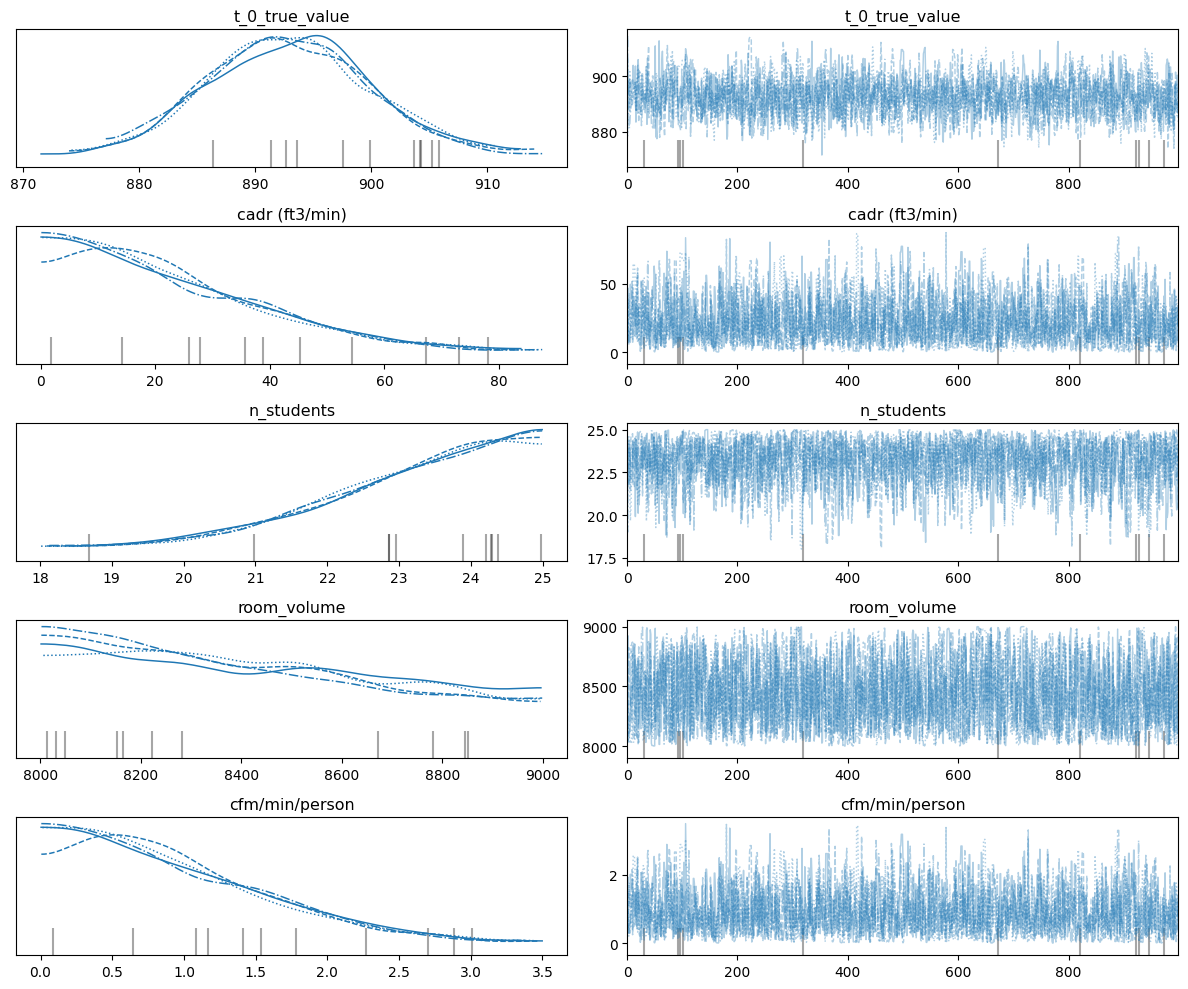

In [134]:

az.plot_trace(trace_1);
plt.tight_layout()


The above says we're only getting somewhere between 6.5 to 9 cubic feet per minute of ventilation. No wonder the CO2 readings kept creeping up for an hour, and only went down because someone was told to go to the bathroom...

In [140]:
def produce_posterior_predictive(trace, upto=180):
    variables = {}
    variables['t_0_true_value'] = np.random.normal(trace.posterior.t_0_true_value[0], variance_term)
    i = 0
    
    variables['t_0_reading'] = np.random.normal(
        variables[f't_{i}_true_value'], 
        variance_term,
    )
    
    for i in range(1, upto):
        variables[f't_{i}_true_value'] = (
            variables[f't_{i-1}_true_value']  
            + (
                (C_supply - variables[f't_{i-1}_true_value']) * trace.posterior['cadr (ft3/min)'][0]
                + (trace.posterior['n_students'][0] * G_p_students +
                n_teachers * G_p_teachers) * 1000000 # multiplying by 1000000 so that we have the rate in m3ppm/min
            ) / trace.posterior['room_volume'][0]
        )
        
        #import pdb; pdb.set_trace()
        variables[f't_{i}_reading'] = np.random.normal(
            variables[f't_{i}_true_value'],
            variance_term
        )
        
    return variables
        
        

In [141]:
posterior_predictive = produce_posterior_predictive(trace_1, 600)

In [142]:

lower_bounds = []
upper_bounds = []

for i in range(1, 600):
    hdi = pm.hdi(posterior_predictive[f't_{i}_reading'].reshape(1000,1))
    lower_bounds.append(hdi[0][0])
    upper_bounds.append(hdi[0][1])

    
    

/var/folders/c3/b8f8shqn6sq34qlk8wt9rcqh0000gn/T/ipykernel_38420/2489245120.py:5: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pm.hdi(posterior_predictive[f't_{i}_reading'].reshape(1000,1))


In [143]:
in_sample_length = 10
in_sample = modeling_time_of_interest.head(in_sample_length)

In [144]:
out_of_sample = modeling_time_of_interest.tail(modeling_time_of_interest.shape[0] - in_sample_length)

In [145]:
in_sample

,Time,CO2,Temp,Humidity,time,Carbon dioxide(ppm)
0,9:20:26,896,21.3,53,2022-09-01 09:20:26,896
1,9:21:26,904,21.2,54,2022-09-01 09:21:26,904
2,9:22:26,917,21.2,54,2022-09-01 09:22:26,917
3,9:23:26,960,21.2,54,2022-09-01 09:23:26,960
4,9:24:26,977,21.2,54,2022-09-01 09:24:26,977
5,9:25:26,988,21.1,54,2022-09-01 09:25:26,988
6,9:26:26,1017,21.1,54,2022-09-01 09:26:26,1017
7,9:27:26,1043,21.1,54,2022-09-01 09:27:26,1043
8,9:28:26,1068,21.1,54,2022-09-01 09:28:26,1068
9,9:29:26,1086,21.1,54,2022-09-01 09:29:26,1086


Text(0.5, 1.0, 'WCPSS District 9 Elem 01, Portable 01, Student 01, Sept 1, 2022 Model')

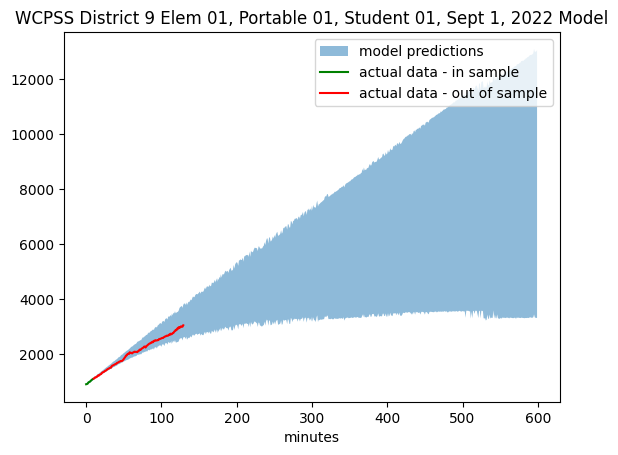

In [148]:
fig, ax = plt.subplots(1,1)

ax.fill_between(x=list(range(1,600)), y1=lower_bounds, y2=upper_bounds, alpha=0.5)
ax.set_xlabel("minutes")
ax.plot(list(range(0, in_sample_length)), in_sample['Carbon dioxide(ppm)'], color='g')
ax.plot(list(range(in_sample_length, modeling_time_of_interest.shape[0])), out_of_sample['Carbon dioxide(ppm)'], color='red')
ax.legend(["model predictions", "actual data - in sample", "actual data - out of sample"])
ax.set_title("WCPSS District 9 Elem 01, Portable 01, Student 01, Sept 1, 2022 Model")

The model is a good model in a sense that it is able to predict the actual data that was recorded. The model predicts that if we kept staying there, the steady state concentration would have been between 2500-3000 ppm.

If you improve ventilation so that readings are below 700 ppm, the risk would be at most about 7.6%, for people staying there for an hour:



In [20]:
1-np.exp(-(700-420) / 38000 * 1 / 3 * 130 * 1 * 0.5 * 0.5)

0.0767216891701642

When in steady state, the rate of generation of CO2 particles and the rate of removal of CO2 particles is the same. Therefore:

$$
\begin{equation}
\begin{aligned}
  \frac{dC}{dt} &= \frac{n \cdot G_p \cdot C_{breath} + C_{supply} \cdot CADR - C_{i, t} \cdot CADR}{V} \\
  0 &= n \cdot G_p \cdot C_{breath} + C_{supply} \cdot CADR - C_{i, t} \cdot CADR \\
  &= n \cdot G_p \cdot C_{breath} + (C_{supply} - C_{i, t}) \cdot CADR \\
  (C_{i, t} - C_{supply}) \cdot CADR &= n \cdot G_p \cdot C_{breath} \\
  CADR &= \frac{n \cdot G_p \cdot C_{breath}}{C_{i, t} - C_{supply}}
\end{aligned}
\end{equation}
$$


The amount of clean air at 420ppm needed to get to 700ppm steady state, assuming 3 occupants, is about 70 cubic feet per minute:

In [21]:
n * G_p * C_breath / (700 - 420)

69.0147857142857

The amount of clean air at 420ppm needed to get to 600ppm steady state, assuming 3 occupants, is about 107 cubic feet per minute:

In [22]:
n * G_p * C_breath / (600 - 420)

107.35633333333331

...etc.

In [23]:
n * G_p * C_breath / (500 - 420)

241.55174999999994

In [24]:
n * G_p * C_breath / (450 - 420)

644.1379999999998

## Possible solutions

### Portable Air Cleaning
One could get *at least* 70 cubic feet per minute of clean air by using portable air cleaners. See [Clean Air Stars Air Filter Recommendation Tool](https://cleanairstars.com/filters). Using portable air cleaners wouldn't decrease the amount of CO2 in the air, but that would definitely decrease the amount of aerosols that may contain viral particles. 

### Ventilation 

One could also reach out to ventilation professionals to increase the amount of outside air coming in. High CO2 could cause drowsiness and [affect employees' cognition and productivity](https://www.hsph.harvard.edu/news/press-releases/office-air-quality-may-affect-employees-cognition-productivity/), but in terms of protecting employees and customers from COVID-19, flu, RSV, and other respiratory viruses, using portable air cleaners would suffice.

### Masking

Upgrading to N95s for employees would make them *much* safer. Assuming 700ppm steady state, and the customer is infectious and is wearing only a surgical mask, the risk to employees decreases to 0.008 (or about 1 in 126):

In [25]:
1-np.exp(-(700-420) / 38000 * 1 / 3 * 130 * 1 * 0.5 * (1-0.95))

0.007950680941589905